# Visulise GAM for Cluster at Markov Time 19.95



A notebook which visulaises a clustering and it's GAM score at a given markov time t.

## Google Drive

In [1]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
root = '/content/drive/My Drive/Project/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Libraries

In [2]:
# standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [3]:
%%capture
# geopandas install
import os
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
os.chdir('/content/spatialindex-src-1.8.5')
!./configure
!make
!make install
!ldconfig
!pip install descartes
!pip install rtree
!pip install geopandas

# geopandas import
import geopandas as gpd

In [4]:
# bokeh import
from bokeh.models import HoverTool, ColumnDataSource
from bokeh.plotting import figure, save, show, output_file
from bokeh.layouts import column
# allows visualisation in notebook
from bokeh.io import output_notebook
from bokeh.resources import INLINE
output_notebook(INLINE)
# folium
import folium
import branca.colormap as cm

In [5]:
# import classes
import sys
sys.path.append(root + 'Classes')
from Stability_class import Stability
from GAM_class import GAM
from Benchmark_class import Benchmark

## Load Data

Load in MSOAs data.

In [6]:
MSOAs = gpd.read_file(root + 'MSOAs/MSOAs.shp')
print('Shape: ',MSOAs.shape)
MSOAs.head()

Shape:  (6790, 6)


,msoa11cd,msoa11nm,st_areasha,pop,con_trust,geometry
0,E02000001,City of London 001,2.983633e+06,6031.0,0,"POLYGON ((-0.09276 51.52139, -0.08813 51.51941..."
1,E02000002,Barking and Dagenham 001,2.091907e+06,7131.0,0,"POLYGON ((0.14112 51.58054, 0.13788 51.57812, ..."
2,E02000003,Barking and Dagenham 002,2.122216e+06,10437.0,0,"POLYGON ((0.14838 51.58075, 0.14698 51.57568, ..."
3,E02000004,Barking and Dagenham 003,2.569470e+06,6393.0,0,"POLYGON ((0.19018 51.55268, 0.18600 51.54753, ..."
4,E02000005,Barking and Dagenham 004,1.111109e+06,9116.0,0,"POLYGON ((0.15043 51.56561, 0.14998 51.56138, ..."


Load in Pro

In [7]:
Pro = gpd.read_file(root + 'MSOAs/PRO.shp')
print('Shape: ',Pro.shape)
Pro.head()

Shape:  (140, 2)


,NAME,geometry
0,ISLE OF WIGHT NHS TRUST,POINT (-1.30133 50.71084)
1,BARTS HEALTH NHS TRUST,POINT (-0.05813 51.51902)
2,ROYAL SURREY COUNTY HOSPITAL NHS FOUNDATION TRUST,POINT (-0.60746 51.24102)
3,WESTON AREA HEALTH NHS TRUST,POINT (-2.97140 51.32233)
4,YEOVIL DISTRICT HOSPITAL NHS FOUNDATION TRUST,POINT (-2.63471 50.94484)


Loads in stability data by creating an instance of Stability class.

In [8]:
stability_data = Stability(root + 'Stability Data/longrun.mat')

# N x T array of cluster labels.
C = stability_data.C
# Array of number of communities.
k = stability_data.k
# Array of Markov times
times = stability_data.t
# Array of Variation of Information.
VI = stability_data.VI

## Cluster Dataframes

Find index of Markov Time under investigation.

In [9]:
# time to find index for
time = float(input('What time to 4 s.f?\n'))
 
# function which converts array to 4.s.f
def sf4(x):
    x = float(np.format_float_positional(x, precision=4, unique=False, fractional=False))
    return x
vec_sf4 = np.vectorize(sf4)

# gets index 
idx = int(np.where(vec_sf4(times) == time)[0][0])

What time to 4 s.f?
19.95


Obtain dataframe for cluster at time t.

In [10]:
stab_df, n, _= stability_data.cluster_df(MSOAs,idx)
print('Number of Communities: ', n)
stab_df.head()

Number of Communities:  54


,msoa11cd,msoa11nm,st_areasha,pop,con_trust,geometry,label
0,E02000001,City of London 001,2.983633e+06,6031.0,0,"POLYGON ((-0.09276 51.52139, -0.08813 51.51941...",0
1,E02000002,Barking and Dagenham 001,2.091907e+06,7131.0,0,"POLYGON ((0.14112 51.58054, 0.13788 51.57812, ...",0
2,E02000003,Barking and Dagenham 002,2.122216e+06,10437.0,0,"POLYGON ((0.14838 51.58075, 0.14698 51.57568, ...",0
3,E02000004,Barking and Dagenham 003,2.569470e+06,6393.0,0,"POLYGON ((0.19018 51.55268, 0.18600 51.54753, ...",0
4,E02000005,Barking and Dagenham 004,1.111109e+06,9116.0,0,"POLYGON ((0.15043 51.56561, 0.14998 51.56138, ...",0


Obtain dataframe for random cluster at time t.

In [11]:
ran_df = Benchmark(MSOAs).sample(root + 'Stability Data/longrun.mat',idx)
ran_df.head()

,msoa11cd,msoa11nm,st_areasha,pop,con_trust,geometry,label
0,E02000001,City of London 001,2.983633e+06,6031.0,0,"POLYGON ((-0.09276 51.52139, -0.08813 51.51941...",42
1,E02000002,Barking and Dagenham 001,2.091907e+06,7131.0,0,"POLYGON ((0.14112 51.58054, 0.13788 51.57812, ...",50
2,E02000003,Barking and Dagenham 002,2.122216e+06,10437.0,0,"POLYGON ((0.14838 51.58075, 0.14698 51.57568, ...",18
3,E02000004,Barking and Dagenham 003,2.569470e+06,6393.0,0,"POLYGON ((0.19018 51.55268, 0.18600 51.54753, ...",37
4,E02000005,Barking and Dagenham 004,1.111109e+06,9116.0,0,"POLYGON ((0.15043 51.56561, 0.14998 51.56138, ...",49


## GAM Dataframes

Obtain dataframe including GAM data for stability cluster at time t at MSOA resolution.

Code for first run:

In [12]:
"""# initialises class
stab_gam = GAM(stab_df)
# gets neighbors
stab_gam.get_neighs() 
# gets df
MSOA_stab_df, GAM_score = stab_gam.GAM_df()

# saves df
MSOA_stab_df.to_file(root  + 'Cluster_Visualisation/' + str(time) + '/MSOA_stab_df.shp')

# saves score
with open(root  + 'Cluster_Visualisation/' + str(time) + '/GAM_score.pickle','wb') as f:
    pickle.dump(GAM_score, f)

print('GAM Score: ', GAM_score)
MSOA_stab_df.head()"""

"# initialises class\nstab_gam = GAM(stab_df)\n# gets neighbors\nstab_gam.get_neighs() \n# gets df\nMSOA_stab_df, GAM_score = stab_gam.GAM_df()\n\n# saves df\nMSOA_stab_df.to_file(root  + 'Cluster_Visualisation/' + str(time) + '/MSOA_stab_df.shp')\n\n# saves score\nwith open(root  + 'Cluster_Visualisation/' + str(time) + '/GAM_score.pickle','wb') as f:\n    pickle.dump(GAM_score, f)\n\nprint('GAM Score: ', GAM_score)\nMSOA_stab_df.head()"

Code for later runs:

In [13]:
MSOA_stab_df = gpd.read_file(root  + 'Cluster_Visualisation/' + str(time) + '/MSOA_stab_df.shp')
with open(root  + 'Cluster_Visualisation/' + str(time) + '/GAM_score.pickle', 'rb') as f:
    GAM_score = pickle.load(f)
    
print('GAM Score: ', GAM_score)
MSOA_stab_df.head()

GAM Score:  0.8827246486028535


,msoa11cd,msoa11nm,st_areasha,pop,con_trust,numneigh,label,comneigh,gi,geometry
0,E02000001,City of London 001,2.983633e+06,6031.0,0,10.0,0,4.0,0.4,"POLYGON ((-0.09276 51.52139, -0.08813 51.51941..."
1,E02000002,Barking and Dagenham 001,2.091907e+06,7131.0,0,6.0,0,6.0,1.0,"POLYGON ((0.14112 51.58054, 0.13788 51.57812, ..."
2,E02000003,Barking and Dagenham 002,2.122216e+06,10437.0,0,7.0,0,7.0,1.0,"POLYGON ((0.14838 51.58075, 0.14698 51.57568, ..."
3,E02000004,Barking and Dagenham 003,2.569470e+06,6393.0,0,5.0,0,5.0,1.0,"POLYGON ((0.19018 51.55268, 0.18600 51.54753, ..."
4,E02000005,Barking and Dagenham 004,1.111109e+06,9116.0,0,5.0,0,5.0,1.0,"POLYGON ((0.15043 51.56561, 0.14998 51.56138, ..."


Obtain dataframe including GAM data for stability cluster at time t at cluster resolution.

Code for first run:

In [14]:
"""# aggregates df
cluster_stab_df = stab_gam.Aggregate()

# saves df
cluster_stab_df.to_file(root  + 'Cluster_Visualisation/' + str(time) + '/cluster_stab_df.shp')

cluster_stab_df.head()"""

"# aggregates df\ncluster_stab_df = stab_gam.Aggregate()\n\n# saves df\ncluster_stab_df.to_file(root  + 'Cluster_Visualisation/' + str(time) + '/cluster_stab_df.shp')\n\ncluster_stab_df.head()"

Use [mapshaper](https://mapshaper.org/) to simplfy boundary.

Code for later runs:

In [15]:
cluster_stab_df = gpd.read_file(root  + 'Cluster_Visualisation/' + str(time) + '/cluster_stab_df.shp')
cluster_stab_df.head()

,label,st_areasha,pop,num_trusts,num_MSOAs,GAM,geometry
0,0,3.229355e+08,1617050.0,2,184,0.919313,"POLYGON ((0.21053 51.49024, 0.18766 51.48786, ..."
1,1,1.858770e+08,1318362.0,3,154,0.842212,"POLYGON ((-0.19740 51.46521, -0.21076 51.46761..."
2,2,1.943974e+09,675948.0,1,83,0.948778,"MULTIPOLYGON (((0.86786 50.93326, 0.85959 50.9..."
3,3,8.876538e+07,390788.0,1,46,0.671285,"POLYGON ((-0.12432 51.28676, -0.13206 51.29606..."
4,4,3.133721e+08,1722522.0,5,201,0.879538,"POLYGON ((-0.14835 51.51268, -0.15073 51.51422..."


Obtain dataframe including GAM data for random cluster at time t at MSOA resolution.

Code for first run:

In [16]:
"""# initialises class
ran_gam = GAM(ran_df)
# gets neighbors
ran_gam.get_neighs() 
# gets df
MSOA_ran_df, bench_score = ran_gam.GAM_df()

# saves df
MSOA_ran_df.to_file(root  + 'Cluster_Visualisation/' + str(time) + '/MSOA_ran_df.shp')

MSOA_stab_df['pop'].astype(float)

# saves score
with open(root  + 'Cluster_Visualisation/' + str(time) + '/bench_score.pickle','wb') as f:
    pickle.dump(bench_score, f)

print('Benchmark Score: ', bench_score)
MSOA_ran_df.head()"""

"# initialises class\nran_gam = GAM(ran_df)\n# gets neighbors\nran_gam.get_neighs() \n# gets df\nMSOA_ran_df, bench_score = ran_gam.GAM_df()\n\n# saves df\nMSOA_ran_df.to_file(root  + 'Cluster_Visualisation/' + str(time) + '/MSOA_ran_df.shp')\n\nMSOA_stab_df['pop'].astype(float)\n\n# saves score\nwith open(root  + 'Cluster_Visualisation/' + str(time) + '/bench_score.pickle','wb') as f:\n    pickle.dump(bench_score, f)\n\nprint('Benchmark Score: ', bench_score)\nMSOA_ran_df.head()"

Code for later runs:

In [17]:
MSOA_ran_df = gpd.read_file(root  + 'Cluster_Visualisation/' + str(time) + '/MSOA_ran_df.shp')
with open(root  + 'Cluster_Visualisation/' + str(time) + '/bench_score.pickle', 'rb') as f:
    bench_score = pickle.load(f)
    
print('Benchmark Score: ', bench_score)
MSOA_ran_df.head()

Benchmark Score:  0.0040265215895227465


,msoa11cd,msoa11nm,st_areasha,pop,con_trust,numneigh,label,comneigh,gi,geometry
0,E02000001,City of London 001,2.983633e+06,6031.0,0,10.0,11,0.0,0.0,"POLYGON ((-0.09276 51.52139, -0.08813 51.51941..."
1,E02000002,Barking and Dagenham 001,2.091907e+06,7131.0,0,6.0,1,0.0,0.0,"POLYGON ((0.14112 51.58054, 0.13788 51.57812, ..."
2,E02000003,Barking and Dagenham 002,2.122216e+06,10437.0,0,7.0,19,0.0,0.0,"POLYGON ((0.14838 51.58075, 0.14698 51.57568, ..."
3,E02000004,Barking and Dagenham 003,2.569470e+06,6393.0,0,5.0,17,1.0,0.2,"POLYGON ((0.19018 51.55268, 0.18600 51.54753, ..."
4,E02000005,Barking and Dagenham 004,1.111109e+06,9116.0,0,5.0,37,0.0,0.0,"POLYGON ((0.15043 51.56561, 0.14998 51.56138, ..."


Obtain dataframe including GAM data for random cluster at time t at cluster resolution.

Code for first run:

In [18]:
"""# aggregates df
cluster_ran_df = ran_gam.Aggregate()

# saves df
cluster_ran_df.to_file(root  + 'Cluster_Visualisation/' + str(time) + '/cluster_ran_df.shp')

cluster_ran_df.head()"""

"# aggregates df\ncluster_ran_df = ran_gam.Aggregate()\n\n# saves df\ncluster_ran_df.to_file(root  + 'Cluster_Visualisation/' + str(time) + '/cluster_ran_df.shp')\n\ncluster_ran_df.head()"

Code for later runs:

In [19]:
cluster_ran_df = gpd.read_file(root  + 'Cluster_Visualisation/' + str(time) + '/cluster_ran_df.shp')
cluster_ran_df.head()

,label,st_areasha,pop,num_trusts,num_MSOAs,GAM,geometry
0,0,3.946257e+09,1138423.0,2,140,0.010039,"MULTIPOLYGON (((-5.09643 50.20907, -5.09272 50..."
1,1,2.552752e+09,1041205.0,3,134,0.001402,"MULTIPOLYGON (((-4.16134 50.38704, -4.16679 50..."
2,2,3.166979e+09,1258590.0,3,160,0.002722,"MULTIPOLYGON (((-5.03044 50.27323, -5.02643 50..."
3,3,4.175037e+09,1031820.0,3,131,0.004081,"MULTIPOLYGON (((-5.09131 50.35212, -5.09039 50..."
4,4,1.854817e+09,849920.0,1,110,0.004976,"MULTIPOLYGON (((-3.53292 50.47651, -3.53110 50..."


Add population density per km^2 to stability dataframes.

In [20]:
MSOA_stab_df['pop_den'] = (MSOA_stab_df['pop']*1000**2)/MSOA_stab_df['st_areasha']
cluster_stab_df['pop_den'] = (cluster_stab_df['pop']*1000**2)/cluster_stab_df['st_areasha']
cluster_ran_df['pop_den'] = (cluster_ran_df['pop']*1000**2)/cluster_ran_df['st_areasha']

Add EMS to dataframes.

In [21]:
# read data
EMS = pd.read_csv(root + 'MSOA Data Preparation/MSOA_EMS.csv')
# merge data
MSOA_stab_df = pd.merge(MSOA_stab_df, EMS,how='left', left_on='msoa11cd',right_on='GEO')
# drop col
MSOA_stab_df = MSOA_stab_df.drop(['GEO'], axis=1)

# finds average EMS
subset = MSOA_stab_df.copy()[['label', 'EMS']]
cluster_EMS = subset.groupby(by='label').sum()
cluster_stab_df['EMS'] = cluster_EMS

## Load Ground Truth

In [22]:
ground_truth = gpd.read_file(root  + 'Cluster_Visualisation/' + str(time) + '/Ceremonial_counties.shp')
ground_truth.head()

,NAME,geometry
0,Bedfordshire,"POLYGON ((-0.14393 52.11774, -0.14419 52.11744..."
1,Berkshire,"POLYGON ((-0.49002 51.49475, -0.49003 51.49474..."
2,Buckinghamshire,"POLYGON ((-0.47659 51.55807, -0.47660 51.55803..."
3,Cambridgeshire,"POLYGON ((0.51448 52.22678, 0.51419 52.22659, ..."
4,Cheshire,"POLYGON ((-1.97479 53.22910, -1.97481 53.22901..."


## Overview of Results

Visualisation of cluster.

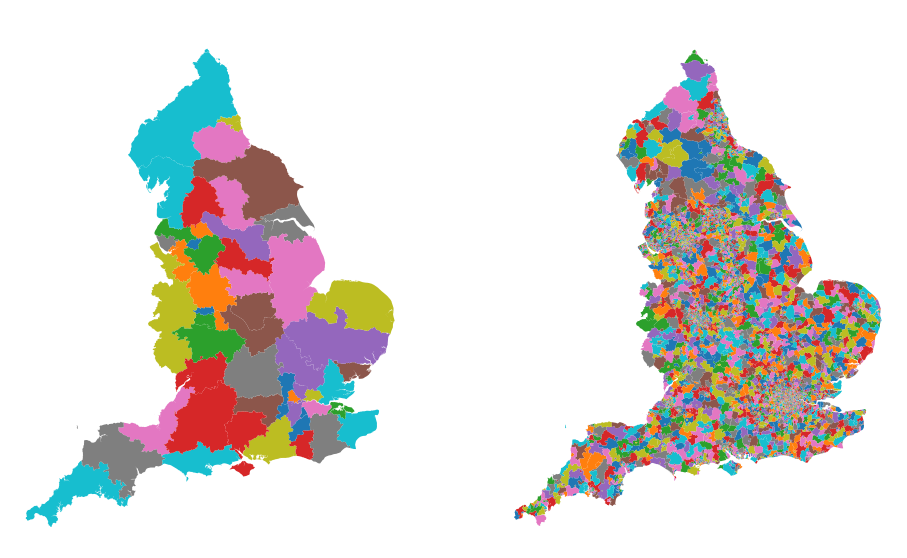

In [23]:
fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
cluster_stab_df.plot(column='GAM',categorical=True,ax=ax1)
cluster_ran_df.plot(column='GAM',categorical=True,ax=ax2)

ax1.set_title('Stability Clustering', color='white',fontsize='16')
ax2.set_title('Benchmark Clustering', color='white',fontsize='16')
ax1.axis('off')
ax2.axis('off')
plt.show()

Summarises results of GAM when applied to the MS clustering at time t.

In [24]:
print('The Geographic Adjacency Score for the MS clustering is: %.5f. \n'%(GAM_score))
print('Time: ',time)
print('Number of Communities: ',n,'\n')
print('Summary of GAM for clustering at MSOA resolution, \n')
MSOA_stab_df[['numneigh','comneigh','gi','pop','pop_den','EMS']].describe()

The Geographic Adjacency Score for the MS clustering is: 0.88272. 

Time:  19.95
Number of Communities:  54 

Summary of GAM for clustering at MSOA resolution, 



,numneigh,comneigh,gi,pop,pop_den,EMS
count,6790.000000,6790.000000,6790.000000,6790.000000,6790.000000,6790.000000
mean,5.706038,5.207658,0.926438,7932.776436,3416.481119,1.703181
std,2.135050,1.959871,0.156338,1682.414016,3646.733955,0.664814
min,1.000000,0.000000,0.000000,4950.000000,5.557069,1.000000
25%,4.000000,4.000000,1.000000,6639.000000,729.223026,1.217430
50%,5.000000,5.000000,1.000000,7726.500000,2596.698659,1.477802
75%,7.000000,6.000000,1.000000,8904.500000,4613.425084,1.996292
max,22.000000,19.000000,1.000000,16794.000000,27710.025594,6.454510


In [25]:
print('Summary of GAM for the MS clustering at cluster resolution, \n')
cluster_stab_df[['num_MSOAs','num_trusts','GAM','st_areasha','pop','pop_den','EMS']].describe()

Summary of GAM for the MS clustering at cluster resolution, 



,num_MSOAs,num_trusts,GAM,st_areasha,pop,pop_den,EMS
count,54.000000,54.000000,54.000000,5.400000e+01,5.400000e+01,54.000000,54.000000
mean,125.740741,2.592593,0.874489,2.415492e+09,9.974732e+05,1190.688821,214.159269
std,44.764872,1.205624,0.052931,2.254780e+09,3.678630e+05,1525.067770,104.922907
min,43.000000,1.000000,0.671285,8.876538e+07,3.571400e+05,110.831054,61.453207
25%,100.000000,2.000000,0.850099,5.581606e+08,7.801845e+05,305.958813,151.487422
50%,125.000000,2.500000,0.879730,2.090070e+09,9.877130e+05,509.619114,198.731396
75%,157.000000,3.000000,0.908179,2.859837e+09,1.259170e+06,1537.423026,247.954519
max,248.000000,6.000000,0.960835,1.019572e+10,2.063682e+06,7092.657982,623.803276


Summarises results of GAM when applied to the random clustering at time t.

In [26]:
print('The Geographic Adjacency Score for the random clustering is: %.5f. \n'%(bench_score))
print('Time: ',time)
print('Number of Communities: ',n,'\n')
print('Summary of GAM for clustering at MSOA resolution, \n')
MSOA_ran_df[['numneigh','comneigh','gi']].describe()

The Geographic Adjacency Score for the random clustering is: 0.00403. 

Time:  19.95
Number of Communities:  54 

Summary of GAM for clustering at MSOA resolution, 



,numneigh,comneigh,gi
count,6790.000000,6790.000000,6790.000000
mean,5.706038,0.106333,0.018441
std,2.135050,0.324578,0.060721
min,1.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000
75%,7.000000,0.000000,0.000000
max,22.000000,3.000000,1.000000


In [27]:
print('Summary of GAM for the random clustering at cluster resolution, \n')
cluster_ran_df[['num_MSOAs','num_trusts','GAM','st_areasha']].describe()

Summary of GAM for the random clustering at cluster resolution, 



,num_MSOAs,num_trusts,GAM,st_areasha
count,54.000000,54.000000,54.000000,5.400000e+01
mean,125.740741,2.592593,0.004007,2.415492e+09
std,11.634667,1.353103,0.002035,5.605961e+08
min,101.000000,0.000000,0.001402,1.661607e+09
25%,118.250000,2.000000,0.002690,1.973867e+09
50%,126.000000,3.000000,0.003422,2.297193e+09
75%,133.000000,3.000000,0.004966,2.683364e+09
max,160.000000,6.000000,0.010557,4.175037e+09


## Plotting Functions

Create categorical colormap for folium and bokeh.

In [28]:
#creates categorical colour map
catcolormap = cm.linear.Spectral_11.to_step(index=np.arange(-0.5,n))

hex_map = []
import matplotlib.colors as colors

for color in catcolormap.colors:
    hex_map.append(colors.rgb2hex(color))

catcolormap

Create sequential colormap.

In [29]:
def seq_colormap(df, col):
    colormap = cm.linear.RdBu_11.scale(max(0, round(min(df[col]),3)-0.001),
                                       min(1, round(max(df[col]),3)+0.001))
    return colormap


Barchart function.

In [30]:
def barchart(col,title,y_label):
    """Uses cluster_stab_df to make barchart for data in column with label col
    """

    # gets array of col and labels.
    num = np.array(cluster_stab_df[col])
    labels = np.array(cluster_stab_df['label'])

    # converts data type for hover
    bar_source = ColumnDataSource(data=dict(
        num=num,
        label=labels,
        color=hex_map
    ))

    plot = figure(title=title, 
                  x_axis_label = 'Cluster Label',y_axis_label = y_label,
                  plot_width=900, plot_height=400,tools=['save'])

    plot.vbar(x='label', top='num',color='color', source=bar_source, width=0.9,
              hover_fill_alpha=0.7)

    hover = HoverTool(tooltips=[("Cluster Label","@label"),(y_label,"@num")])
    plot.add_tools(hover)

    return plot

Histogram function.


In [31]:
def histogram(col,title,x_label,intbins=True):
    
    # gets array of col and labels.
    num = np.array(cluster_stab_df[col])

    #creates bins
    if intbins:
        diff = max(num) - min(num)
        step = np.ceil(diff/int(n/2))
        bins = np.arange(min(num), max(num) + step, step)
    
    else:
        bins = np.linspace(min(num), max(num),int(n/2)+1)


    hist, edges = np.histogram(num, bins = bins)

    hist_source = ColumnDataSource(data=dict(
        count=hist,
        start=edges[:-1],
        end=edges[1:]
    ))

    plot = figure(title=title, 
                  x_axis_label = x_label,y_axis_label = 'Count',
                  plot_width=900, plot_height=400,tools=['save'])
    plot.quad(top='count', left='start', right='end',source = hist_source,
              hover_fill_alpha=0.8,line_color='white')

    hover = HoverTool(tooltips=[("Interval","@start to @end"),("Count","@count")])
    plot.add_tools(hover)

    return plot

Layer of Folium map.

In [32]:
def MSOA_Overlay(df, style_function, highlight_function, name):
    """
    Makes plot of a clustering.
    """
    Plot = folium.features.GeoJson(
    df,
    name=name,
    style_function=style_function,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['msoa11nm','label','numneigh','gi','pop','pop_den','EMS'],
        aliases=['MSOA Name','Cluster Label','Number of Neighbors',
                 'Common Neighbors Proportion','Population',
                 'Population Density','EMS'],
        localize = True,
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    ))
    return Plot

def Cluster_Overlay(df, style_function, highlight_function, name, ems=True):
    """
    Makes plot of a clustering.
    """

    fields = ['label','GAM','num_MSOAs','num_trusts','pop','pop_den']
    aliases = ['Cluster Label','GAM','Number of MSOAs','Number of Trusts',
                 'Population','Population Density']
    
    if ems:
      fields.append('EMS')
      aliases.append('EMS')

    Plot = folium.features.GeoJson(
    df,
    name=name,
    style_function=style_function,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=fields,
        aliases=aliases,
        localize = True,
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    ))
    return Plot


def addmarkers(map, color='black'):
    """Adds hospital trust locations to map."""

    for i, row in Pro.iterrows():
        marker = folium.CircleMarker(location = [row.geometry.y,row.geometry.x],
                                    radius=3,
                                    color=color, 
                                    popup=row['NAME']).add_to(map)
        
        map.keep_in_front(marker)

Function to bind layer and colormap.

In [33]:
from branca.element import MacroElement
from jinja2 import Template

class BindColormap(MacroElement):
    """Binds a colormap to a given layer.

    Parameters
    ----------
    colormap : branca.colormap.ColorMap
        The colormap to bind.
    """
    def __init__(self, layer, colormap):
        super(BindColormap, self).__init__()
        self.layer = layer
        self.colormap = colormap
        self._template = Template(u"""
        {% macro script(this, kwargs) %}
            {{this.colormap.get_name()}}.svg[0][0].style.display = 'block';
            {{this._parent.get_name()}}.on('overlayadd', function (eventLayer) {
                if (eventLayer.layer == {{this.layer.get_name()}}) {
                    {{this.colormap.get_name()}}.svg[0][0].style.display = 'block';
                }});
            {{this._parent.get_name()}}.on('overlayremove', function (eventLayer) {
                if (eventLayer.layer == {{this.layer.get_name()}}) {
                    {{this.colormap.get_name()}}.svg[0][0].style.display = 'none';
                }});
        {% endmacro %}
        """)  # noqa

## Correlation

In [34]:
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


<Figure size 432x288 with 0 Axes>

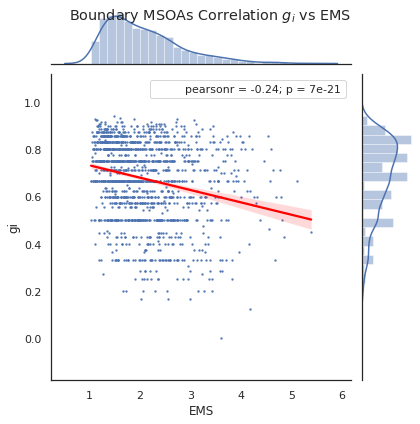

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


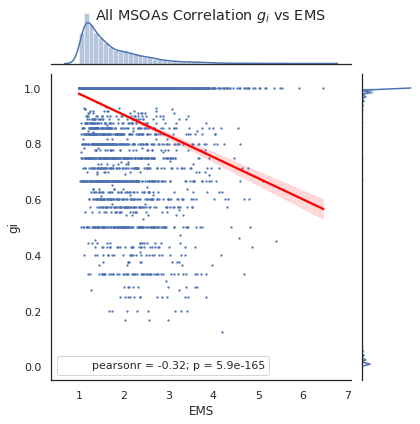

In [35]:
fig = plt.figure()
#sets figure size
sns.set(style='white', color_codes=True) #sets design of figures

g = sns.jointplot(x='EMS', y='gi', data=MSOA_stab_df[MSOA_stab_df['gi'] != 1], kind='reg',joint_kws=dict(scatter_kws={'s':2},line_kws={'color':'red'}))
g.annotate(stats.pearsonr)
plt.suptitle('Boundary MSOAs Correlation $g_{i}$ vs EMS')
plt.show()

g = sns.jointplot(x='EMS', y='gi', data=MSOA_stab_df, kind='reg',joint_kws=dict(scatter_kws={'s':2},line_kws={'color':'red'}))
g.annotate(stats.pearsonr)
plt.suptitle('All MSOAs Correlation $g_{i}$ vs EMS')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


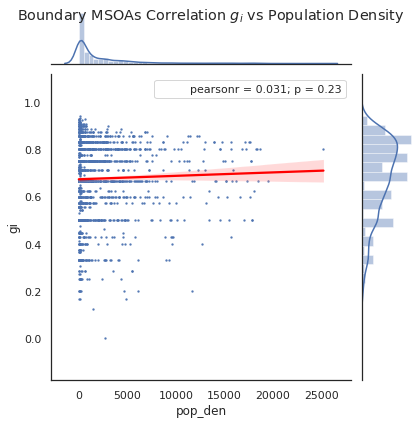

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


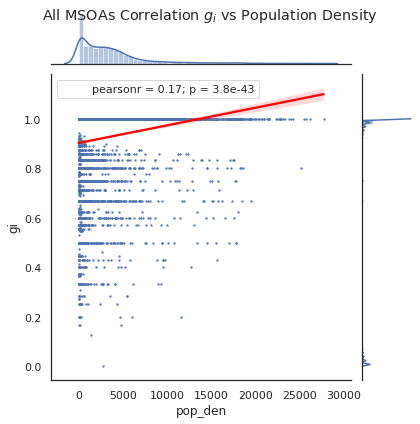

In [36]:
g = sns.jointplot(x='pop_den', y='gi', data=MSOA_stab_df[MSOA_stab_df['gi'] != 1], kind='reg',joint_kws=dict(scatter_kws={'s':2},line_kws={'color':'red'}))
g.annotate(stats.pearsonr)
plt.suptitle('Boundary MSOAs Correlation $g_{i}$ vs Population Density')
plt.show()

g = sns.jointplot(x='pop_den', y='gi', data=MSOA_stab_df, kind='reg',joint_kws=dict(scatter_kws={'s':2},line_kws={'color':'red'}))
g.annotate(stats.pearsonr)
plt.suptitle('All MSOAs Correlation $g_{i}$ vs Population Density')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


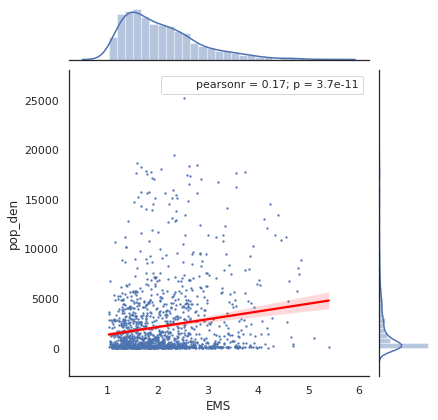

In [37]:
sns.set(style='white', color_codes=True) #sets design of figures
g = sns.jointplot(x='EMS', y='pop_den', data=MSOA_stab_df[MSOA_stab_df['gi'] != 1], kind='reg',joint_kws=dict(scatter_kws={'s':2},line_kws={'color':'red'}))
g.annotate(stats.pearsonr)
plt.show()

## Distribution of Attributes Across Clusters

Plot displaying of number of trusts per cluster.

In [38]:
output_file(root  + 'Plots/' + str(time) + '/Trusts.html')
bar=barchart('num_trusts','Number of Trusts Across Clusters at time %.4g.' %(time),'Number of Trusts')
hist=histogram('num_trusts','Number of Trusts Histogram','Number of Trusts')
show(column(bar, hist))

Output hidden; open in https://colab.research.google.com to view.

Plot displaying number of number of MSOAs per cluster.

In [39]:
output_file(root  + 'Plots/' + str(time) + '/MSOAs.html')
bar=barchart('num_MSOAs','Number of MSOAs Across Clusters at time %.4g.' %(time),'Number of MSOAs')
hist=histogram('num_MSOAs','Number of MSOAs Histogram','Number of MSOAs')
show(column(bar, hist))

Output hidden; open in https://colab.research.google.com to view.

Plot displaying of number of GAM score per cluster.

In [40]:
output_file(root  + 'Plots/' + str(time) + '/GAM Score.html')
bar=barchart('GAM','GAM Score Across Clusters at time %.4g.' %(time),'GAM Score')
hist=histogram('GAM','GAM Score Histogram','GAM Score',intbins=False)
show(column(bar, hist))

Output hidden; open in https://colab.research.google.com to view.

Plot displaying of number of Area per cluster.

In [41]:
output_file(root  + 'Plots/' + str(time) + '/MSOAs.html')
bar=barchart('st_areasha','Area Across Clusters at time %.4g.' %(time),'Area')
hist=histogram('st_areasha','Area Histogram','Area',intbins=False)
show(column(bar, hist))

Output hidden; open in https://colab.research.google.com to view.

Plot displaying population per cluster.

In [42]:
output_file(root  + 'Plots/' + str(time) + '/pop.html')
bar=barchart('pop','Population Across Clusters at time %.4g.' %(time),'Population')
hist=histogram('pop','Population','Population',intbins=False)
show(column(bar, hist))

Output hidden; open in https://colab.research.google.com to view.

Plot displaying population density per cluster.

In [43]:
output_file(root  + 'Plots/' + str(time) + '/pop.html')
bar=barchart('pop_den','Population Density Across Clusters at time %.4g.' %(time),'Population Density')
hist=histogram('pop_den','Population Density Histogram','Population Density',intbins=False)
show(column(bar, hist))

Output hidden; open in https://colab.research.google.com to view.

## MSOA Level Visualisations

### Set Up

Colormaps.

In [44]:
gi_colormap = seq_colormap(MSOA_stab_df, 'gi')
col = MSOA_stab_df['EMS']
ems_colormap = cm.linear.RdBu_11.scale(min(col),
                                       max(col))
col = MSOA_stab_df['pop_den']
den_colormap = cm.linear.RdBu_11.to_step(data=np.log(col), quantiles=np.linspace(0,1,20))
gi_colormap.caption = "Proportion of Common Neighbors"
ems_colormap.caption = "Equivalent Market Size"
den_colormap.caption = "Log Population Density"

Style and highlight functions.

In [45]:
# sets style of MSOA Choropleths
gi_style_function = lambda x: {"weight":0.4,
                            "color":'black',
                            "opacity":1,
                            "fillColor":gi_colormap(x['properties']['gi']), 
                            'fillOpacity':0.8}

                            
ems_style_function = lambda x: {"weight":0.4,
                            "color":'black',
                            "opacity":1,
                            "fillColor":ems_colormap(x['properties']['EMS']), 
                            'fillOpacity':0.8}

den_style_function = lambda x: {"weight":0.4,
                            "color":'black',
                            "opacity":1,
                            "fillColor":den_colormap(np.log(x['properties']['pop_den'])), 
                            'fillOpacity':0.8}

#sets style of highlight                            
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50}

Create layers.

In [46]:
# makes Choropleth layers
gi_layer = MSOA_Overlay(MSOA_stab_df,
                        gi_style_function,
                        highlight_function,
                        'Proportion of Common Neighbors')

#makes Choropleth map
ems_layer = MSOA_Overlay(MSOA_stab_df,
            ems_style_function,
            highlight_function,
            'Equivalent Market Size')

#makes Choropleth map
den_layer = MSOA_Overlay(MSOA_stab_df,
            den_style_function,
            highlight_function,
            'Population Density')

#makes boundaries plot
Boundaries = folium.GeoJson(
    cluster_stab_df,
    name = 'Boundaries',
    style_function = lambda x: {
        'color': 'black',
        'weight': 3,
        "opacity":1,
        'fillOpacity': 0,
        'interactive':False
    })

### Plots

Proportion of common neighbors Choropleth.

In [47]:
#creates map
m = folium.Map([54.5,-3],zoom_start=6.8,min_zoom=6,zoom_control=False,tiles='cartodbpositron')

#titles
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format('Proportion of Common Neighbors Choropleth for Clustering at Time %.4g.' %(time))   

# create feature group.
fg = folium.FeatureGroup(name='Choropleth',show=False)
m.add_child(fg)

# add gi layer to fg
gi_layer.add_to(fg)

#makes boundaries plot
Boundaries.add_to(fg)

#adds title and color map to plot
m.get_root().html.add_child(folium.Element(title_html))
m.add_child(gi_colormap)

# add markers
addmarkers(m, 'white')

# layer control
m.add_child(folium.LayerControl('topleft',collapsed=False))

# save and display
m.save(root  + 'Plots/' + str(time) + '/gi_Choropleth.html')
display(m)

Output hidden; open in https://colab.research.google.com to view.

Population density Choropleth.

In [48]:
#creates map
m = folium.Map([54.5,-3],zoom_start=6.8,min_zoom=6,zoom_control=False, tiles='cartodbpositron')

#titles
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format('Population Density of Choropleth and Clustering at Time %.4g.' %(time))   

# create feature group.
fg = folium.FeatureGroup(name='Choropleth',show=False)
m.add_child(fg)

# add gi layer to fg
den_layer.add_to(fg)

#makes boundaries plot
Boundaries.add_to(fg)

#adds title and color map to plot
m.get_root().html.add_child(folium.Element(title_html))
m.add_child(den_colormap)

# add markers
addmarkers(m)

# layer control
m.add_child(folium.LayerControl('topleft', collapsed=False))

# save and display
m.save(root  + 'Plots/' + str(time) + '/den_Choropleth.html')
display(m)

Output hidden; open in https://colab.research.google.com to view.

### Save Combined Plot

Both Choropleths on 1 plot.

In [49]:
#creates map
m = folium.Map([54.5,-3],zoom_start=6.8,min_zoom=6,zoom_control=False,tiles='cartodbpositron')

#titles
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format('Choropleths at MSOA Level at Time %.4g.' %(time))   

# create feature group.
gi_fg = folium.FeatureGroup(name='Proportion of Common Neighbors',show=False)
m.add_child(gi_fg)

# create feature group.
ems_fg = folium.FeatureGroup(name='Equivalent Market Size',show=False)
m.add_child(ems_fg)

# create feature group.
den_fg = folium.FeatureGroup(name='Population Density',show=False)
m.add_child(den_fg)

# create feature group.
bound_fg = folium.FeatureGroup(name='Boundaries',show=False)
m.add_child(bound_fg)

# add gi layer to fg
gi_layer.add_to(gi_fg)
ems_layer.add_to(ems_fg)
den_layer.add_to(den_fg)
Boundaries.add_to(bound_fg)

m.keep_in_front(bound_fg)

# layer control
m.add_child(folium.LayerControl('topleft',collapsed=False))

#adds title and color map to plot
m.get_root().html.add_child(folium.Element(title_html))
m.add_child(gi_colormap).add_child(den_colormap).add_child(ems_colormap)
m.add_child(BindColormap(gi_fg, gi_colormap)).add_child(BindColormap(den_fg, den_colormap)).add_child(BindColormap(ems_fg, ems_colormap))

# add markers
addmarkers(m)

# save and display
m.save(root  + 'Plots/' + str(time) + '/MSOA_Choropleths.html')

## Cluster Level Visualisations

### Setup

Colormaps.

In [50]:
GAM_colormap = seq_colormap(cluster_stab_df, 'GAM')
col = cluster_stab_df['num_trusts']
trusts_colormap = cm.linear.RdBu_11.scale(min(col), max(col))
col = cluster_stab_df['pop_den']
den_colormap = cm.linear.RdBu_11.scale(min(col), max(col))
col = cluster_stab_df['EMS']
ems_colormap = cm.linear.RdBu_11.scale(min(col), max(col))
GAM_colormap.caption = "Geographic Adjacency Measure"
trusts_colormap.caption = "Number of Trusts"
den_colormap.caption = "Population Density"
ems_colormap.caption = "Equivalent Market Size"

Style functions (Same highlight as MSOA).

In [51]:
# sets style of Cluster Choropleths
cluster_style_function = lambda x: {"opacity":0.2,
                            "fillColor":catcolormap(x['properties']['label']), 
                            'fillOpacity':0.9}

GAM_style_function = lambda x: {"weight":0.4,
                            "color":'black',
                            "opacity":1,
                            "fillColor":GAM_colormap(x['properties']['GAM']), 
                            'fillOpacity':0.9}

trusts_style_function = lambda x: {"weight":0.4,
                            "color":'black',
                            "opacity":1,
                            "fillColor":trusts_colormap(x['properties']['num_trusts']), 
                            'fillOpacity':0.9}

den_style_function = lambda x: {"weight":0.4,
                            "color":'black',
                            "opacity":1,
                            "fillColor":den_colormap((x['properties']['pop_den'])), 
                            'fillOpacity':0.9}

                            
                            
ems_style_function = lambda x: {"weight":0.4,
                            "color":'black',
                            "opacity":1,
                            "fillColor":ems_colormap((x['properties']['EMS'])), 
                            'fillOpacity':0.9}

Create layers.

In [52]:
# makes Choropleth layers
cluster_layer = Cluster_Overlay(cluster_stab_df,
                        cluster_style_function,
                        highlight_function,
                        'Stability Clustering')

bench_layer = Cluster_Overlay(cluster_ran_df,
                        cluster_style_function,
                        highlight_function,
                        'Benchmark Clustering',
                        False)


GAM_layer = Cluster_Overlay(cluster_stab_df,
            GAM_style_function,
            highlight_function,
            'GAM Choropleth')

den_layer = Cluster_Overlay(cluster_stab_df,
            den_style_function,
            highlight_function,
            'Population Density Choropleth')


trusts_layer = Cluster_Overlay(cluster_stab_df,
            trusts_style_function,
            highlight_function,
            'Number of Trusts Choropleth')


ems_layer = Cluster_Overlay(cluster_stab_df,
            ems_style_function,
            highlight_function,
            'Equivalent Market Size')

#makes boundaries plot
Boundaries = folium.GeoJson(
    ground_truth,
    name = '',
    style_function = lambda x: {
        'color': 'black',
        'weight': 2.5,
        "opacity":1,
        'fillOpacity': 0,
        'interactive':False
    })

### Plots

Save plot of Stability, Benchmark and Ground Truth Clusters.

In [53]:
#creates map
m = folium.Map([54.5,-3],zoom_start=6.8,min_zoom=6,tiles='cartodbpositron')

#titles
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format('Catchment Areas at Time %.4g.'%(time))

# create feature group.
stab_fg = folium.FeatureGroup(name='Stability Clustering',show=False)
bench_fg = folium.FeatureGroup(name='Benchmark Clustering',show=False)
truth_fg = folium.FeatureGroup(name='Ground Truth Clustering')
m.add_child(stab_fg)  
m.add_child(bench_fg)
m.add_child(truth_fg)

# add to feature groups.
cluster_layer.add_to(stab_fg)
bench_layer.add_to(bench_fg)
Boundaries.add_to(truth_fg)


# popup
html="""
    <p style="text-align: center;font-size:14px;"><span style="font-family: Arial, Helvetica, sans-serif;"> <strong>Stability GAM Score</strong> &emsp; %.4f </span></p>
    <p style="text-align: center;font-size:14px;"><span style="font-family: Arial, Helvetica, sans-serif;"><strong>Benchmark Score</strong> &emsp; %.4f </span></p>
    """%(GAM_score,bench_score)

iframe = folium.IFrame(html=html, width=240, height=70)
popup = folium.Popup(iframe, max_width=3000)

Text = folium.Marker(location=[53.7,-4.3], popup=popup,
                     icon=folium.Icon(icon_color='white')
                     )
m.add_child(Text)

#adds title to plot
m.get_root().html.add_child(folium.Element(title_html))

# add markers
addmarkers(m)

m.keep_in_front(bound_fg)
m.keep_in_front(stab_fg)

# layer control
m.add_child(folium.LayerControl(collapsed=False))


# save and display
m.save(root  + 'Plots/' + str(time) + '/Clusters.html')

Cluster level Choropleth.

In [54]:
#creates map
m = folium.Map([54.5,-3],zoom_start=6.8,min_zoom=6,zoom_control=False,tiles='cartodbpositron')

#titles
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format('Choropleths at Cluster Level at Time %.4g.' %(time))   

# create feature group.
GAM_fg = folium.FeatureGroup(name='GAM')
den_fg = folium.FeatureGroup(name='Population Density')
trusts_fg = folium.FeatureGroup(name='Number of Trusts')
ems_fg = folium.FeatureGroup(name='EMS')
m.add_child(GAM_fg)
m.add_child(den_fg)
m.add_child(trusts_fg)
m.add_child(ems_fg)

# add to feature groups
GAM_layer.add_to(GAM_fg)
den_layer.add_to(den_fg)
trusts_layer.add_to(trusts_fg)
ems_layer.add_to(ems_fg)

# layer control
m.add_child(folium.LayerControl('topleft',collapsed=False))

#adds title and color map to plot
m.get_root().html.add_child(folium.Element(title_html))
m.add_child(GAM_colormap).add_child(den_colormap).add_child(trusts_colormap).add_child(ems_colormap)
m.add_child(BindColormap(GAM_fg, GAM_colormap))
m.add_child(BindColormap(den_fg, den_colormap))
m.add_child(BindColormap(trusts_fg, trusts_colormap))
m.add_child(BindColormap(ems_fg, ems_colormap))

# add markers
addmarkers(m)

# save and display
m.save(root  + 'Plots/' + str(time) + '/Cluster_Choropleths.html')
display(m)

Output hidden; open in https://colab.research.google.com to view.